# Time Series Forecasting with XGBoost / GBRT

In [1]:
from random import gauss
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
sys.path.insert(2,'..')
import functions
import xgboost as xgb
from sklearn import preprocessing
import annualized_rv as arv
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor # Random Forest model
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting model
from sklearn.ensemble import AdaBoostRegressor # AdaBoost model
import sklearn.ensemble as ensemble

import tensorflow as tf
from tensorflow import keras

import DataProcess

In [2]:
# reads in the historic implied vol data calculated in the dailyaverageIV notebook

aaplHistIV = pd.read_pickle('historicImpliedVolData/aapl_mean_iv_2017_2022.pkl')
googHistIV = pd.read_pickle('historicImpliedVolData/goog_mean_iv_2017_2022.pkl')
msftHistIV = pd.read_pickle('historicImpliedVolData/msft_mean_iv_2017_2022.pkl')
ndxHistIV = pd.read_pickle('historicImpliedVolData/ndx_mean_iv_2017_2022.pkl')
spyHistIV = pd.read_pickle('historicImpliedVolData/spc_mean_iv_2017_2022.pkl')




In [24]:

X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21) #preprocess spy 
X_train_reshape = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
#reshape data for xgboost
def reshape2d(X_train,X_test):
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
    return X_train,X_test

In [25]:
X_train.shape[2]

4

In [9]:
def modelandeval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    MSE,RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test, y_pred)
    
    return RMSE, MAE, R2, MSE

In [32]:
#XGBoost model

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.21991062797022953,
 0.17311773731482058,
 0.47953121360780104,
 0.0483606842942607)

In [33]:
#RandomForestModel
model = ensemble.RandomForestRegressor(n_estimators=100) # reccomended forest tree size
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.20167229059689526,
 0.15555989431008957,
 0.5622816900213097,
 0.040671712794598566)

In [34]:
#GBRT Model
model =ensemble.GradientBoostingRegressor()
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)


(0.20045185612310418,
 0.15307376879904414,
 0.5675634282216453,
 0.04018094662319766)

In [35]:
#AdaBoost Model
model = ensemble.AdaBoostRegressor()
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.2662655971289159,
 0.21761078110714738,
 0.23698624758007736,
 0.07089736821441814)

In [36]:
#STACKING MODEL 

estimators = [
    ('rf', ensemble.RandomForestRegressor(n_estimators=100)),
    ('gbrt', ensemble.GradientBoostingRegressor()),
    ('xgb', xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000))
]

model = ensemble.StackingRegressor(estimators=estimators, final_estimator=ensemble.RandomForestRegressor(n_estimators=100))
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.23724663377076785,
 0.1839884397165235,
 0.3942375207345338,
 0.05628596523556084)

C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5891
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1526
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1945
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1190
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1052
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0948
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0839
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0985
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0925
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0794
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0745
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0951
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0824
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0791
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0702
Epoc

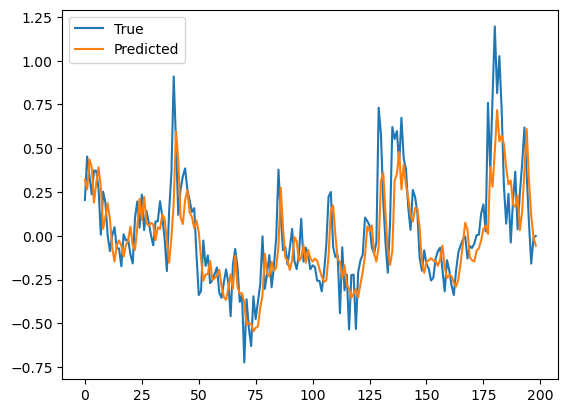

In [37]:
#LSTM Model
seq_length = 100

model = keras.models.Sequential([
    keras.layers.LSTM(seq_length, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(seq_length),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

# pass tensors instead of numpy arrays
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
y_pred = model.predict(X_test_tensor)
y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency

DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
DataProcess.plot(y_test_tensor, y_pred)

# Evaluation

# Using other data

In [36]:
def preprocess_data_for_tickers(ticker_data_dict, seq_length, splits=5, window=21,reshape = True):
    X_train_reshape_list = []
    X_test_reshape_list = []
    y_train_reshape_list = []
    y_test_reshape_list = []
    
    for ticker, data in ticker_data_dict.items():
        X_train, X_test, y_train, y_test = DataProcess.preprocess_data(data, ticker, seq_length=seq_length, splits=splits, window=window)
        if reshape:
            X_train, X_test = reshape2d(X_train,X_test)
        X_train_reshape_list.append(X_train)
        X_test_reshape_list.append(X_test)
        y_train_reshape_list.append(y_train)
        y_test_reshape_list.append(y_test)
    return X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list, X_train.shape
# Example usage
ticker_data_dict = {
    'AAPL': aaplHistIV,
    'GOOG': googHistIV,
    'MSFT': msftHistIV,
    'SPY': spyHistIV
}

X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list,_ = preprocess_data_for_tickers(ticker_data_dict, seq_length=60)


In [15]:
def average_metrics(model,X_train, X_test, y_train, y_test):
    RMSE, MAE, R2,MSE = 0,0,0,0
    for X_train, X_test, y_train, y_test in zip(X_train, X_test, y_train, y_test):
        RMSE_, MAE_, R2_, MSE_ = modelandeval(model,X_train, X_test, y_train, y_test)
        RMSE += RMSE_
        MAE += MAE_
        R2 += R2_
        MSE += MSE_
    print(f'Average RMSE: {RMSE/4}')
    print(f'Average MAE: {MAE/4}')
    print(f'Average R2: {R2/4}')
    print(f'Average MSE: {MSE/4}')
    return None

In [41]:
# xgboost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)




Average RMSE: 0.2854948037620782
Average MAE: 0.21926092939376757
Average R2: 0.5602175248375658
Average MSE: 0.08338524382516437


In [42]:
#RandomForestModel
model = ensemble.RandomForestRegressor(n_estimators=100) # reccomended forest tree size
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)

Average RMSE: 0.25718795413116174
Average MAE: 0.19595120813050523
Average R2: 0.6358340741543936
Average MSE: 0.06770358975296158


In [43]:
#GBRT Model

model =ensemble.GradientBoostingRegressor()
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)                 

Average RMSE: 0.2637671301021554
Average MAE: 0.20111553873935972
Average R2: 0.6270559078578957
Average MSE: 0.07145403110851378


In [44]:
#Bagging Model
model = ensemble.BaggingRegressor()
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)

Average RMSE: 0.26724811568527584
Average MAE: 0.20615390616488843
Average R2: 0.606708811396895
Average MSE: 0.07282754831941747


In [45]:
#STACKING MODEL

estimators = [
    ('rf', ensemble.RandomForestRegressor(n_estimators=100)),
    ('gbrt', ensemble.HistGradientBoostingRegressor()),
    ('bag',ensemble.BaggingRegressor()),
    ('xgb', xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000))
]

model = ensemble.StackingRegressor(estimators=estimators, final_estimator=ensemble.RandomForestRegressor(n_estimators=100))
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)

Average RMSE: 0.2824828920859422
Average MAE: 0.21781168132087775
Average R2: 0.555702393373473
Average MSE: 0.08102841279469328


NameError: name 'lstm_shape' is not defined

In [15]:
#LSTM Model
seq_length = 60

model = keras.models.Sequential([
    keras.layers.LSTM(4, return_sequences=True, input_shape=(X_train_lstm[0].shape[1], X_train_lstm[0].shape[2])),
    keras.layers.LSTM(4),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')




C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
rmse, mae, r2, mse  = 0,0,0,0

for X_train, X_test, y_train, y_test in zip(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm):
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
    model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
    y_pred = model.predict(X_test_tensor)
    y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency
    MSE, RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
    rmse += RMSE
    mae += MAE
    r2 += R2
    mse += MSE

print(f'Average RMSE: {rmse/4}')
print(f'Average MAE: {mae/4}')
print(f'Average R2: {r2/4}')
print(f'Average MSE: {mse/4}')

NameError: name 'X_train_lstm' is not defined

In [14]:
#gru model
model = keras.models.Sequential([
    keras.layers.GRU(4, return_sequences=True, input_shape=(X_train_lstm[0].shape[1], X_train_lstm[0].shape[2])),
    keras.layers.GRU(4),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
rmse, mae, r2, mse  = 0,0,0,0
allhistory= []
for X_train, X_test, y_train, y_test in zip(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm):
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
    history = model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
    y_pred = model.predict(X_test_tensor)
    y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency
    MSE, RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
    rmse += RMSE
    mae += MAE
    r2 += R2
    mse += MSE
print(f'Average RMSE: {rmse/4}')
print(f'Average MAE: {mae/4}')
print(f'Average R2: {r2/4}')
print(f'Average MSE: {mse/4}')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.2363
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.7625
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.5099
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.3957
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.3170
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2767
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2601
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2559
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2557
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1981
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1587
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2182
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2005
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1675
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1564
Epoc

 # exploring relationship between seq length and loss

In [62]:
X_train_lstm, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list,_ = preprocess_data_for_tickers(ticker_data_dict, seq_length=30)

X_train_lstm[0].shape

(1022, 120)

In [64]:
rmse, mae, r2, mse  = 0,0,0,0
allhistory= []
for seq_length in range(10,100,5):
    X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm , lstm_shape = preprocess_data_for_tickers(ticker_data_dict, seq_length,reshape = False)
    
    model = keras.models.Sequential([
        keras.layers.LSTM(4, return_sequences=True, input_shape=(X_train_lstm[0].shape[1], X_train_lstm[0].shape[2])),
        keras.layers.LSTM(4),
        keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    rmse, mae, r2, mse  = 0,0,0,0
    for X_train, X_test, y_train, y_test in zip(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm):
        X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
        history = model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32,verbose = 0)
        y_pred = model.predict(X_test_tensor)
        y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency
        MSE, RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
        rmse += RMSE
        mae += MAE
        r2 += R2
        mse += MSE
    print(f'Average RMSE: {rmse/4}')
    print(f'Average MAE: {mae/4}')
    print(f'Average R2: {r2/4}')
    print(f'Average MSE: {mse/4}')

    #record seq length and loss
    allhistory.append([seq_length,rmse/4,mae/4,r2/4,mse/4,history])

C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Average RMSE: 0.25588973239064217
Average MAE: 0.19289769232273102
Average R2: 0.6648119472587999
Average MSE: 0.0670872488990426


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Average RMSE: 0.25841791555285454
Average MAE: 0.19448495283722878
Average R2: 0.655752694534231
Average MSE: 0.06932627037167549


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Average RMSE: 0.25707272812724113
Average MAE: 0.19266529008746147
Average R2: 0.6618873899622888
Average MSE: 0.06827841140329838


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Average RMSE: 0.26351579651236534
Average MAE: 0.19941774010658264
Average R2: 0.6391728637573454
Average MSE: 0.07131127826869488


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Average RMSE: 0.26142529770731926
Average MAE: 0.19567570090293884
Average R2: 0.6415002637097331
Average MSE: 0.07016683928668499


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Average RMSE: 0.25862810760736465
Average MAE: 0.194989163428545
Average R2: 0.6441425351219237
Average MSE: 0.06855888105928898


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Average RMSE: 0.2553703859448433
Average MAE: 0.19324014335870743
Average R2: 0.6499306331672895
Average MSE: 0.06687516532838345


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Average RMSE: 0.25714073330163956
Average MAE: 0.19315028563141823
Average R2: 0.6407863779685756
Average MSE: 0.06786430161446333


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Average RMSE: 0.2654610089957714
Average MAE: 0.20257636532187462
Average R2: 0.6302330600984766
Average MSE: 0.07267682999372482


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Average RMSE: 0.2707354202866554
Average MAE: 0.20936528593301773
Average R2: 0.6131583546650174
Average MSE: 0.0756478738039732


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Average RMSE: 0.27446531504392624
Average MAE: 0.20820725336670876
Average R2: 0.6090176723521064
Average MSE: 0.07822091411799192


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Average RMSE: 0.27227459847927094
Average MAE: 0.2051512636244297
Average R2: 0.5910655625697094
Average MSE: 0.07510211411863565


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Average RMSE: 0.25474948808550835
Average MAE: 0.1934828832745552
Average R2: 0.6421996669119645
Average MSE: 0.06629393249750137


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Average RMSE: 0.25515811890363693
Average MAE: 0.19207452610135078
Average R2: 0.6451570610159185
Average MSE: 0.06670108996331692


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Average RMSE: 0.27353763952851295
Average MAE: 0.20692195743322372
Average R2: 0.6017041149299377
Average MSE: 0.07752076350152493


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Average RMSE: 0.2683154456317425
Average MAE: 0.20114650577306747
Average R2: 0.6157041904615456
Average MSE: 0.07517625018954277


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Average RMSE: 0.284431517124176
Average MAE: 0.21679327636957169
Average R2: 0.5763101956016534
Average MSE: 0.08417855761945248


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Average RMSE: 0.27065740153193474
Average MAE: 0.20778721198439598
Average R2: 0.6066637775305052
Average MSE: 0.07535284571349621


Text(0.5, 1.0, 'loss vs Seq Length')

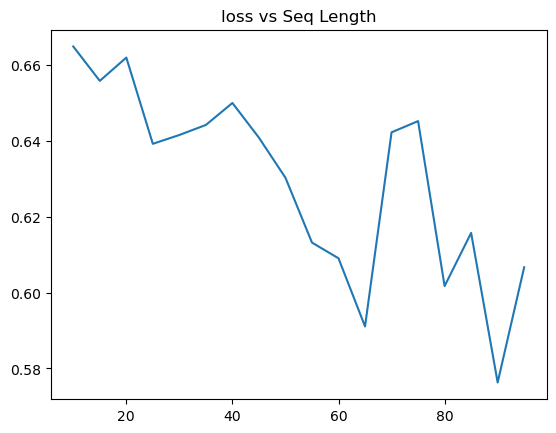

In [67]:
#plotting loss vs seq length
allhistory = np.array(allhistory)
plt.plot(allhistory[:,0],allhistory[:,3])
plt.title('loss vs Seq Length')

In [21]:
lstm_shape

(1039, 10, 4)